In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%matplotlib inline

In [3]:
! curl https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml -o haarcascade_frontalface_default.xml

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  908k  100  908k    0     0  1232k      0 --:--:-- --:--:-- --:--:-- 1230k


We will use pretrained model from opencv github repo, this Haar-Cascade model has high accuracy for detecting multiple frontal faces in an image.

In [4]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [5]:
img = cv2.imread('group.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_boxes = img.copy()

In [6]:
gray = cv2.cvtColor(img_boxes, cv2.COLOR_BGR2GRAY)

The variable faces below will have coordinates of the faces

In [7]:
faces = face_cascade.detectMultiScale(gray,1.1,4)

In [8]:
for (x,y,w,h) in faces:
    cv2.rectangle(img_boxes,(x,y),(x+w,y+h),(255,0,0),2)

Below I am displaying the image with bounding boxes drawn.

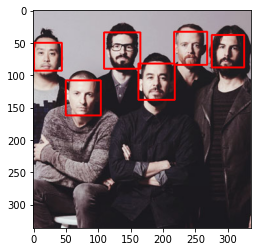

In [9]:
plt.imshow(img_boxes)
plt.show()

In [10]:
def blurr_faces(image, factor=3.0):
    
    (h,w) = image.shape[:2]
    kW = int(w/factor)
    kH = int(h/factor)
    
    if kW % 2 == 0:
        kW -= 1
    if kH % 2 == 0:
        kH -= 1
    
    return cv2.GaussianBlur(image,(kW,kH),0)


In [11]:
img1 = img.copy()

Below we select the face to be blurred:

In [12]:
(x,y,w,h) = faces[1]
img2 = img1[y:y+h,x:x+w]

In [13]:
img2 = blurr_faces(img2)

In [14]:
img[y:y+h,x:x+w] = img2

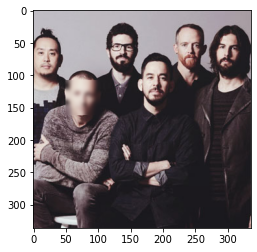

In [15]:
plt.imshow(img)
plt.show()

Output image with face blurred.